In [20]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate synthetic clusters
X, y = make_blobs(n_samples=5000, centers=5, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


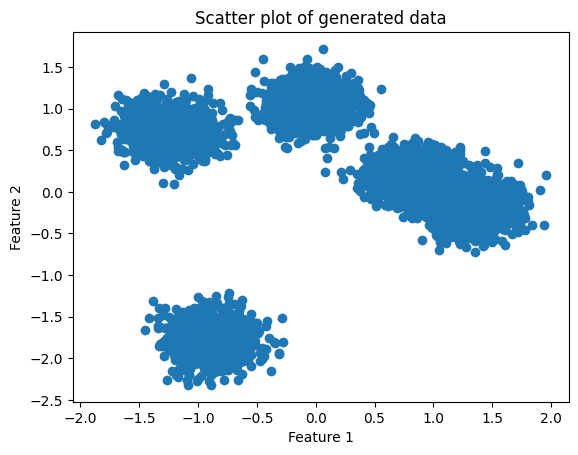

In [21]:
import matplotlib.pyplot as plt

# Scatter plot of the standardized data
plt.scatter(X_std[:, 0], X_std[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of generated data')
plt.show()


In [24]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X_std)


DBSCAN(eps=0.1)

In [25]:
# Access cluster labels
cluster_labels = dbscan.labels_

# Calculate the estimated number of clusters (excluding noise points)
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

# Calculate the number of noise points
num_noise_points = list(cluster_labels).count(-1)

print("Estimated number of clusters:", num_clusters)
print("Number of noise points:", num_noise_points)


Estimated number of clusters: 4
Number of noise points: 43


In [26]:
from sklearn import metrics

# True labels (ground truth)
true_labels = y

# Evaluate clustering performance
homogeneity = metrics.homogeneity_score(true_labels, cluster_labels)
completeness = metrics.completeness_score(true_labels, cluster_labels)
v_measure = metrics.v_measure_score(true_labels, cluster_labels)
adjusted_rand_index = metrics.adjusted_rand_score(true_labels, cluster_labels)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(
    true_labels, cluster_labels)
silhouette_coefficient = metrics.silhouette_score(X_std, cluster_labels)

print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-measure:", v_measure)
print("Adjusted Rand Index:", adjusted_rand_index)
print("Adjusted Mutual Information:", adjusted_mutual_info)
print("Silhouette Coefficient:", silhouette_coefficient)


Homogeneity: 0.8196468846526819
Completeness: 0.963181295627492
V-measure: 0.8856361561356312
Adjusted Rand Index: 0.7738243391666406
Adjusted Mutual Information: 0.885512268597382
Silhouette Coefficient: 0.712388242661681
